### Importing saved Model from file

In [7]:
import joblib
import os
os.chdir(r"C:\Users\sagar\Documents\Major Project")

model_filename = "svm_model.pkl"

# Check if the model file exists
if os.path.isfile(model_filename):
    # Load the saved SVM model from a file
    loaded_model = joblib.load(model_filename)
    print(f"Model loaded from {model_filename}")
else:
    print(f"The model file {model_filename} does not exist. Please train and save the model first.")


The model file svm_model.pkl does not exist. Please train and save the model first.


In [8]:
import joblib
import os

model_filename = "hashing_vectorizer.pkl"

# Check if the model file exists
if os.path.isfile(model_filename):
    # Load the saved SVM model from a file
    loaded_model = joblib.load(model_filename)
    print(f"Model loaded from {model_filename}")
else:
    print(f"The model file {model_filename} does not exist. Please train and save the model first.")


Model loaded from hashing_vectorizer.pkl


### Loading the dataset

In [9]:
import pandas as pd
import numpy as np

# Load the dataset from a CSV file
#df = pd.read_csv('spam_ham_dataset.csv')
df = pd.read_csv('spam_ham_dataset.csv')


In [10]:
print(os.getcwd())

C:\Users\sagar\Documents\Major Project


### Dropping unnecessary columns

In [11]:
df = df.drop(df.columns[0], axis=1)
df = df.drop("label", axis=1)


### Viewing the dataframe

In [12]:
print(df)

                                                   text  label_num
0     Subject: enron methanol ; meter # : 988291\r\n...          0
1     Subject: hpl nom for january 9 , 2001\r\n( see...          0
2     Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3     Subject: photoshop , windows , office . cheap ...          1
4     Subject: re : indian springs\r\nthis deal is t...          0
...                                                 ...        ...
5166  Subject: put the 10 on the ft\r\nthe transport...          0
5167  Subject: 3 / 4 / 2000 and following noms\r\nhp...          0
5168  Subject: calpine daily gas nomination\r\n>\r\n...          0
5169  Subject: industrial worksheets for august 2000...          0
5170  Subject: important online banking alert\r\ndea...          1

[5171 rows x 2 columns]


### Getting Summary

In [13]:
# Display the first few rows of the dataset
print(df.head())

# Get information about the dataset
print(df.info())

# Get summary statistics
print(df.describe())


                                                text  label_num
0  Subject: enron methanol ; meter # : 988291\r\n...          0
1  Subject: hpl nom for january 9 , 2001\r\n( see...          0
2  Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3  Subject: photoshop , windows , office . cheap ...          1
4  Subject: re : indian springs\r\nthis deal is t...          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB
None
         label_num
count  5171.000000
mean      0.289886
std       0.453753
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


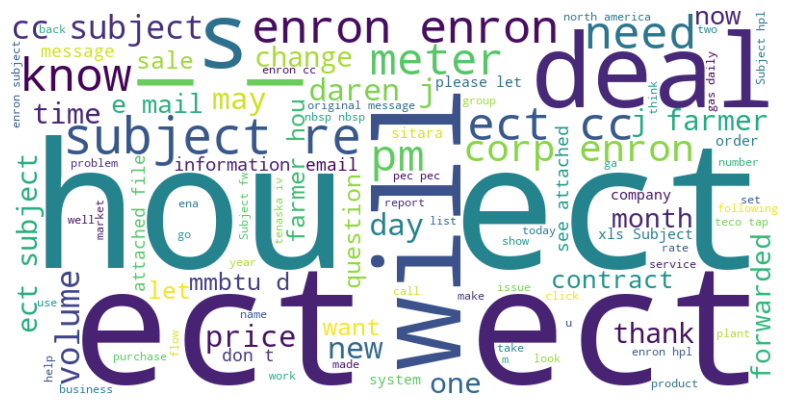

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all email text into a single string
all_text = ' '.join(df['text'])

# Create a WordCloud object with optional settings (e.g., background color, max words)
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


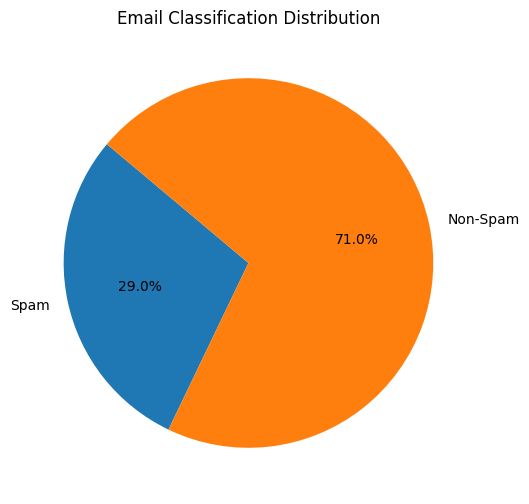

In [15]:
import matplotlib.pyplot as plt

# Count the number of spam and non-spam emails
spam_count = df['label_num'].sum()
non_spam_count = len(df) - spam_count

# Prepare data for the pie chart
labels = ['Spam', 'Non-Spam']
sizes = [spam_count, non_spam_count]

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Email Classification Distribution')

# Display the chart
plt.show()


### Assigning feature and labels

In [16]:
# Example assuming 'label' is the target variable and 'feature_column' is a feature
X = df[['text']]
y = df['label_num']


### Fitting and transforming feature set

In [17]:
from sklearn.feature_extraction.text import HashingVectorizer

hashing_vectorizer = HashingVectorizer(stop_words='english')

X = hashing_vectorizer.fit_transform(df['text'])
y = df['label_num']

### Splitting dataset for training and testing

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Using model SVM using SGD

In [19]:
from sklearn.linear_model import SGDClassifier

svm_classifier = SGDClassifier(loss="hinge", alpha=0.001, max_iter=100)


#### Non-Batch Training

In [20]:
svm_classifier = SGDClassifier(loss='hinge', alpha=0.0001, max_iter=100, random_state=42)

# Step 5: Train the classifier
svm_classifier.fit(X_train, y_train)

SGDClassifier(max_iter=100, random_state=42)

#### Batch Training

In [21]:
import numpy as np
import sys

# Define the batch size
batch_size = 32

# Initialize the SGDClassifier
svm_classifier = SGDClassifier(loss='hinge', alpha=0.0001, max_iter=100, random_state=42)
count = 0
# Iterate over mini-batches
for i in range(0, X_train.shape[0], batch_size):
    # Get the current mini-batch
    X_batch = X_train[i:i+batch_size]
    y_batch = y_train.iloc[i:i+batch_size]

    # Update the SVM model with the current mini-batch
    svm_classifier.partial_fit(X_batch, y_batch, classes=[0, 1])

    # Print training progress
    sys.stdout.write("\rTraining progress: {}/{} mini-batches processed".format(i // batch_size + 1, X_train.shape[0] // batch_size +1))
    sys.stdout.flush()
    count = i
    

print("\nModel training complete.")


Training progress: 130/130 mini-batches processed
Model training complete.


#### Accuracy Testing

In [22]:
from sklearn.metrics import accuracy_score

y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9855072463768116


### Visualizing Confusion Matrix

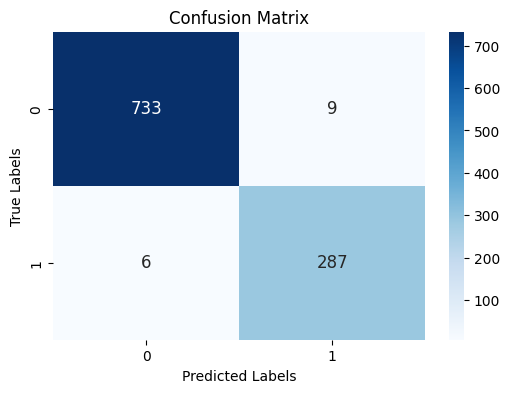

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have predicted labels (y_pred) and true labels (y_true)
# y_pred contains the predicted labels (0 for non-spam, 1 for spam) for your test data
# y_true contains the true labels (0 for non-spam, 1 for spam) for your test data

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


```
              Predicted
              |  Non-Spam (0) |  Spam (1)
Actual   |--------------------------------
Non-Spam |   True Negative  | False Positive
(0)      |--------------------------------
Spam     |   False Negative | True Positive
(1)      |--------------------------------
```
**True Negative (TN)**: The model correctly predicted "Non-Spam" for emails that are actually not spam.  
**False Positive (FP)**: The model incorrectly predicted "Spam" for emails that are actually not spam.  
**False Negative (FN):** The model incorrectly predicted "Non-Spam" for emails that are actually spam.  
**True Positive (TP):** The model correctly predicted "Spam" for emails that are actually spam.

### Classification Report

In [26]:
import pandas as pd
from sklearn.metrics import classification_report

# Assuming you have predicted labels (y_pred) and true labels (y_test)
# Calculate the classification report as a dictionary
class_names = ['spam','non-spam']
report_dict = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

# Convert the dictionary to a Pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Create a copy of the DataFrame with styling options
styled_report_df = report_df.style \
    .format("{:.2f}", subset=pd.IndexSlice[:, ['precision', 'recall', 'f1-score']]) \
    .background_gradient(cmap='coolwarm', subset=pd.IndexSlice[:, ['precision', 'recall', 'f1-score']]) \
    .set_caption('Classification Report') \
    .set_table_styles([{'selector': 'caption',
                       'props': [('font-size', '16px'), ('font-weight', 'bold')]}])

# Display the styled dataframe
styled_report_df


,precision,recall,f1-score,support
spam,0.99,0.99,0.99,742.000000
non-spam,0.97,0.98,0.97,293.000000
accuracy,0.99,0.99,0.99,0.985507
macro avg,0.98,0.98,0.98,1035.000000
weighted avg,0.99,0.99,0.99,1035.000000


## Test Single Mail 

In [27]:
single_message = input("Enter Mail Content")
single_message_lower = single_message.lower()

X_single_message = hashing_vectorizer.transform([single_message_lower])


prediction = svm_classifier.predict(X_single_message)

print("\n\n")
# Interpret the prediction
if prediction == 1:
    print("The mail is predicted as spam.")
else:
    print("The mail is predicted as not spam.")

KeyboardInterrupt: Interrupted by user

#### Applying incremental learning by partial fitting

In [ ]:
single_message_features = hashing_vectorizer.transform([single_message_lower])

label_flattened = np.array(prediction).ravel()
# Update the SVM model with the new data
svm_classifier.partial_fit(single_message_features, label_flattened, classes=[0, 1])


### Saving the model

In [ ]:
import joblib

# Save the trained SVM model to a file
model_filename = "svm_model.pkl"
joblib.dump(svm_classifier, model_filename)
print(f"Model saved as {model_filename}")


In [ ]:
import joblib

# Save the trained SVM model to a file
model_filename = "hashing_vectorizer.pkl"
joblib.dump(hashing_vectorizer, model_filename, compress=True)
print(f"Model saved as {model_filename}")
